### Importando os modulos que serão utilizados para facilitar a análise dos dados

In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib as mpl

from pathlib import Path
from re import compile as cp
from calendar import month_abbr
from os import mkdir, path


### Cria a pasta Médias e a pasta Figuras para poderem ser salvos os resultados obtidos

In [72]:
if not path.exists('dados/radar/medias'):
    mkdir('dados/radar/medias')
    mkdir('dados/radar/figuras')

### Cria uma lista de todos os arquivos dentro da pasta passada dentro do Path('.')(Para mudar de pasta, só mudar o '.', pelo nome da pasta. Ex: Path('casa'))

In [73]:
caminho = Path('dados/radar/VentoSJC')
arquivos = sorted([i for i in caminho.glob('*.txt')])


### Procura pelo ano e mês dentro do nome do arquivo. Util para saber qual mês está sendo trabalhado e de qual ano

In [74]:
compilado = cp('[a-z]|[A-Z]')
ano = cp('\d\d\d\d')

# Ler os dados, calcula a média e salva na pasta médias

In [75]:
ucolunas = range(0, 8)

cabe = ['tempo', '81', '84', '87', '90', '93', '96', '99']


for i in arquivos:
    df = pd.read_csv(i, sep='\s+',skiprows=[0], usecols=ucolunas, names=cabe)
    nome = ''.join(compilado.findall(str(i)))
    anos = ''.join(ano.findall(str(i)))
    mes = (anos[4:6])
    inicio = 0
    fim = 24
    medias = []

    while inicio <= len(df):
        laco = df[inicio:fim].mean()
        medias.append(laco)
        inicio = fim
        fim+=24
    
    if 'Meridional' in str(i):
        nome_arquivo_final = "dados_meridional"
    else:
        nome_arquivo_final = "dados_zonal"

    medias = pd.DataFrame(medias)

    medias.dropna(how='all', inplace=True)

    medias.to_string(f'dados/radar/medias/{nome_arquivo_final}_{anos[:4]}{mes}.txt', index=False)

## Defini o estilo para a plotagem dos gráficos

In [76]:
mpl.style.use('ggplot')
# mpl.rcParams['font.family'] = ['Family1', 'Serif', 'cursive']
mpl.rcParams['font.size'] = 30
mpl.rcParams['figure.max_open_warning'] = 50

## Cria uma lista com todos os dados salvos dentro da pasta médias

In [77]:
caminho_medias = 'dados/radar/medias'
c_medias = Path(caminho_medias)
arquivos3 = sorted([i for i in c_medias.glob('*.txt')])

In [78]:
[arq for arq in arquivos3 if "zonal" in str(arq) and "2005" in str(arq)]

[WindowsPath('dados/radar/medias/dados_zonal_200501.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200502.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200503.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200504.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200505.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200506.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200507.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200508.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200509.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200510.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200511.txt'),
 WindowsPath('dados/radar/medias/dados_zonal_200512.txt')]

In [79]:
dados_zonal_2005 = [arq for arq in arquivos3 if "zonal" in str(arq) and "2005" in str(arq)]
dados_zonal_2006 = [arq for arq in arquivos3 if "zonal" in str(arq) and "2006" in str(arq)]
dados_meridional_2005 = [arq for arq in arquivos3 if "meridional" in str(arq) and "2005" in str(arq)]
dados_meridional_2006 = [arq for arq in arquivos3 if "meridional" in str(arq) and "2006" in str(arq)]

## Plota os dados e salva as figuras dentro da pasta figuras

In [86]:
def plot_figures(titulo, dados, cabe):
    fig, ax = plt.subplots(6, 2, figsize=(32,48), constrained_layout=True)
    cols = [j for i in range(0, 6) for j in range(0,2)]
    lines = [i for i in range(0, 6) for j in range(0,2)]

    fig.suptitle(titulo, fontsize=40)
    fig.supxlabel('Tempo (dias)', fontsize=40)
    fig.supylabel('Altitudes (km)', fontsize=40)

    min = -100
    max = 100

    for path,i,j in zip(dados, lines, cols):
        df3 = pd.read_csv(path, sep='\s+')
        
        nome_arquivo = str(path)
        
        ano = nome_arquivo[-10:-6]
        mes = nome_arquivo[-6:-4]

        x = df3['tempo'].T
        y = [float(i) for i in cabe[1:]]
        z = df3[cabe[1:]].T
        z_a = np.array(z) 

        X,Y = np.meshgrid(x,y)
        
        norm = plt.Normalize(vmin=min, vmax=max)

        cs = ax[i][j].contourf(X, Y, z_a,levels=100, cmap='jet_r', norm=norm)
        
        ax[i][j].set_title(f'{mes}.{ano}')
        ax[i][j].title.set_size(30)

    sm = plt.cm.ScalarMappable(norm=norm, cmap = cs.cmap)

    fig.colorbar(sm, ax=ax, label='Amplitudes m/s', fraction=0.5, aspect=70)

    plt.savefig(f'dados/radar/figuras/{titulo}.png')
    plt.show()

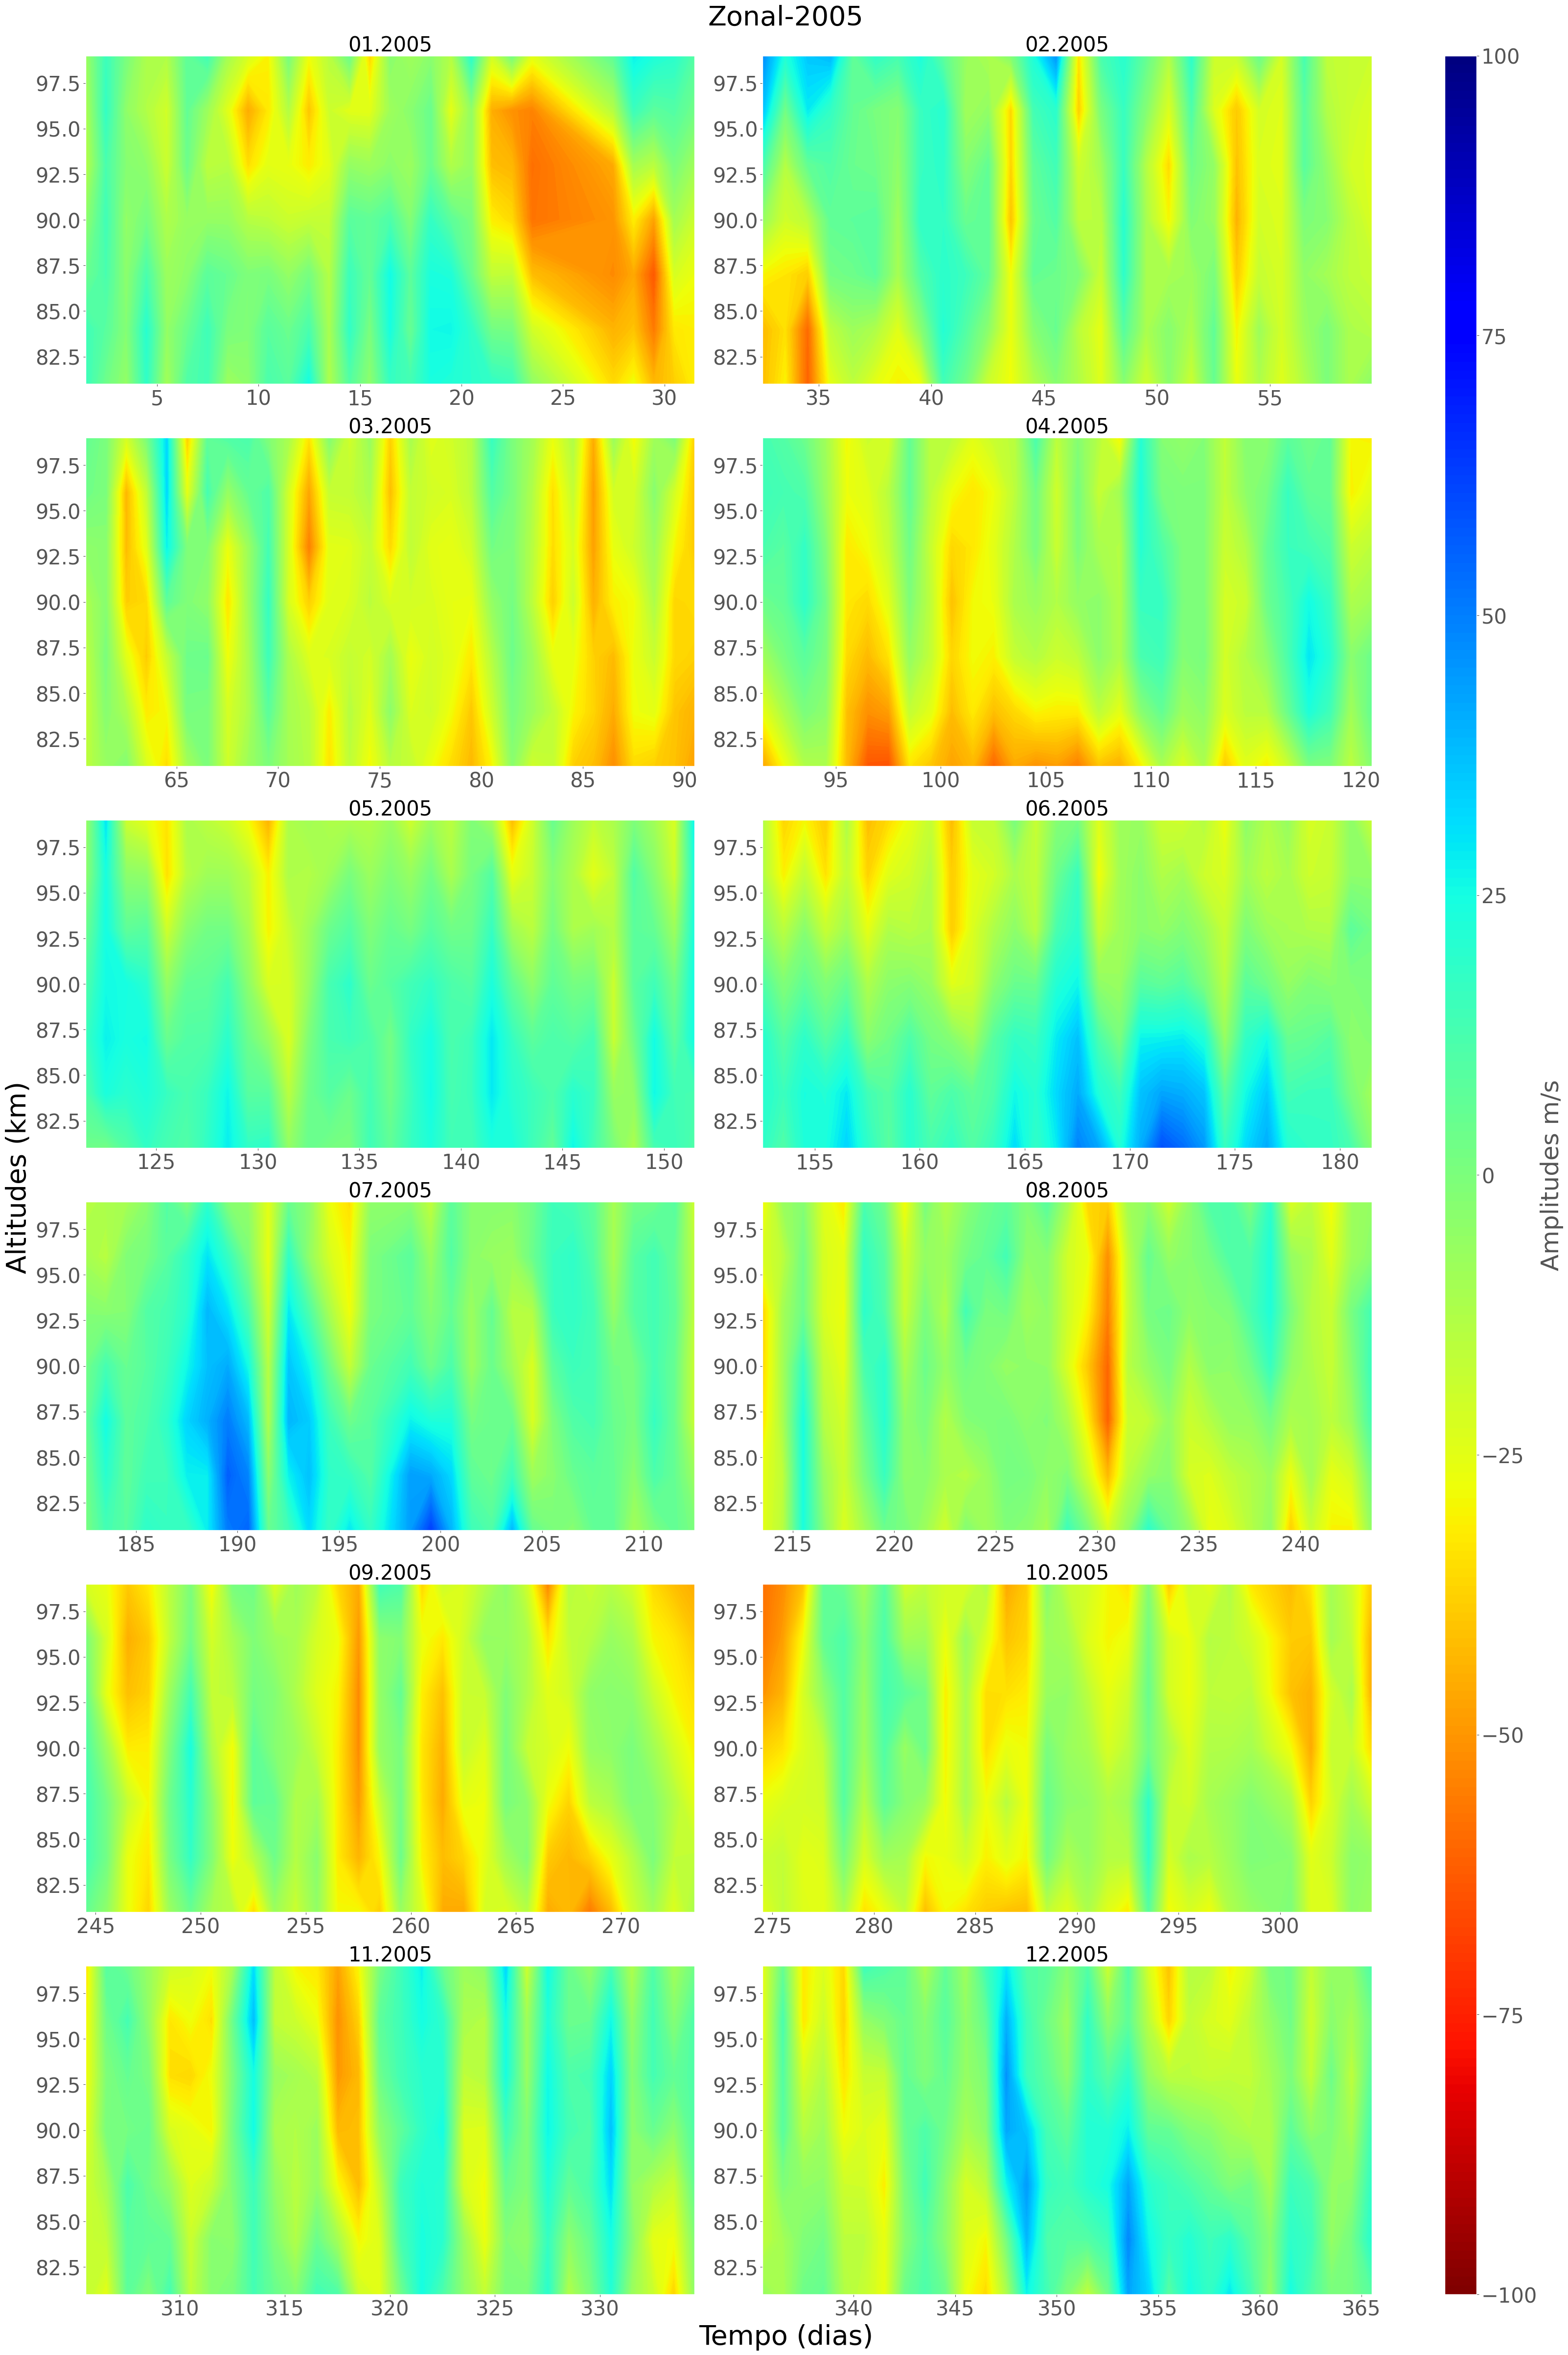

In [87]:
plot_figures("Zonal-2005", dados_zonal_2005, cabe)

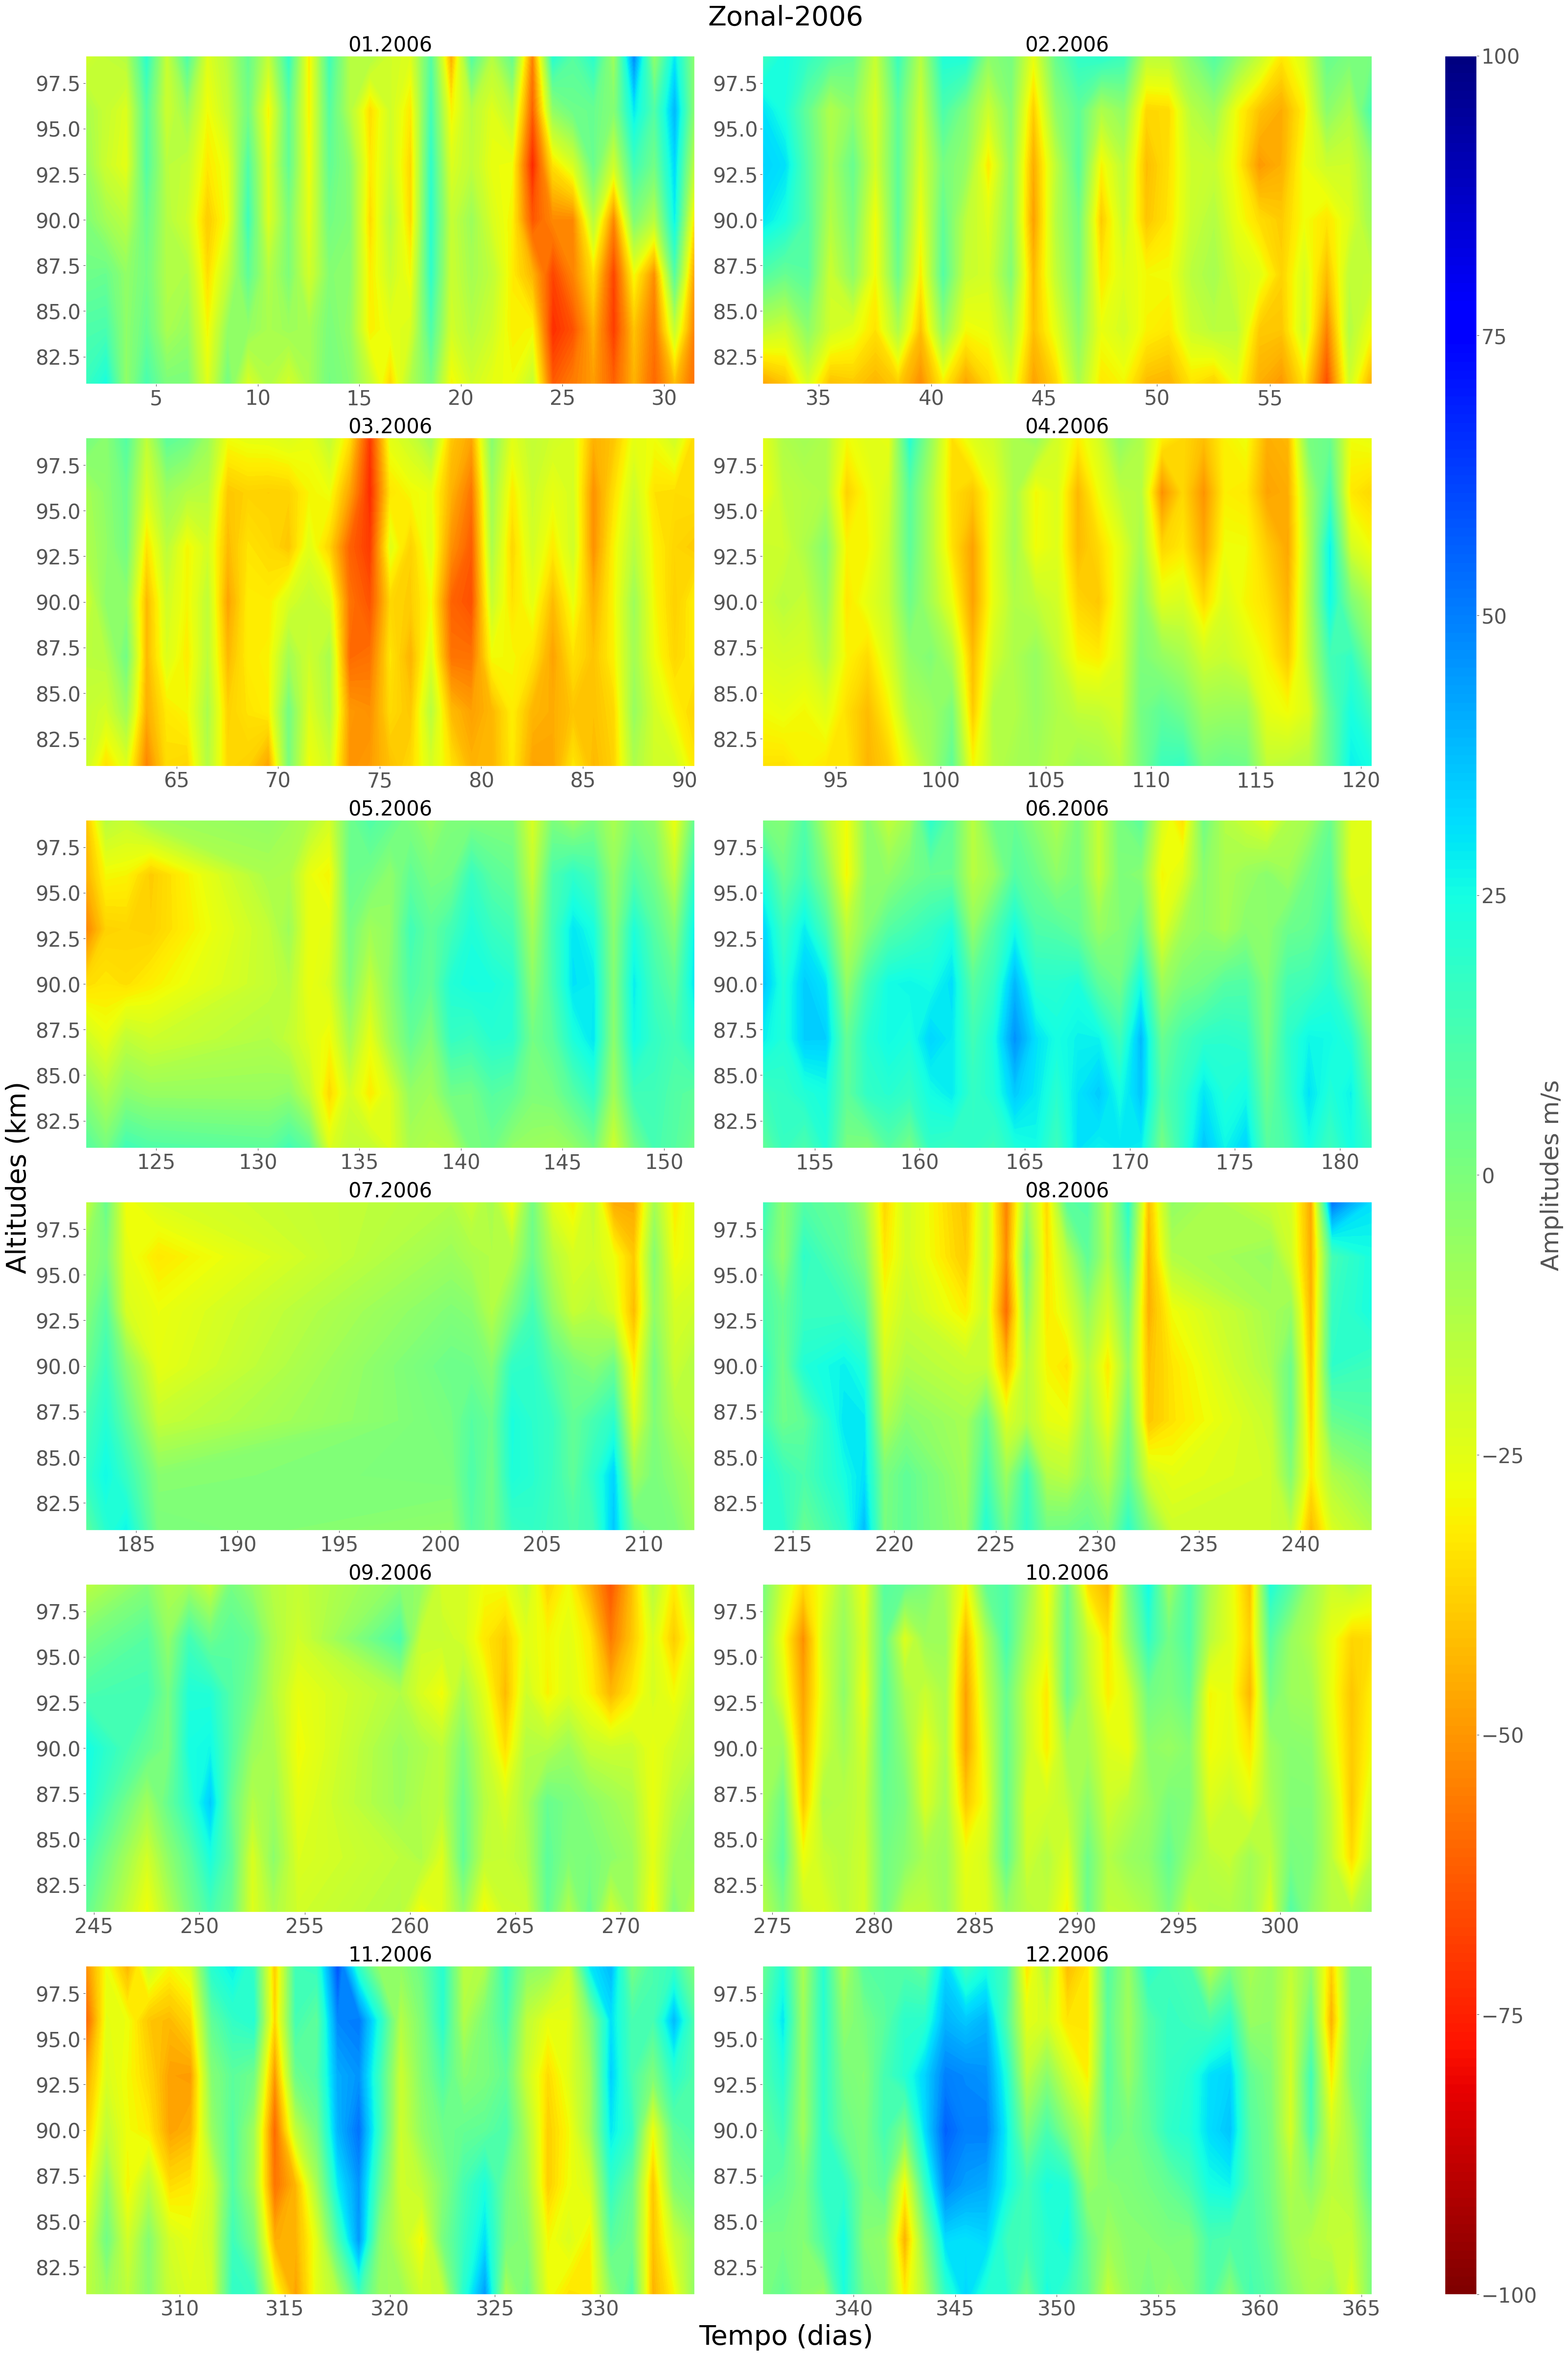

In [88]:
plot_figures("Zonal-2006", dados_zonal_2006, cabe)

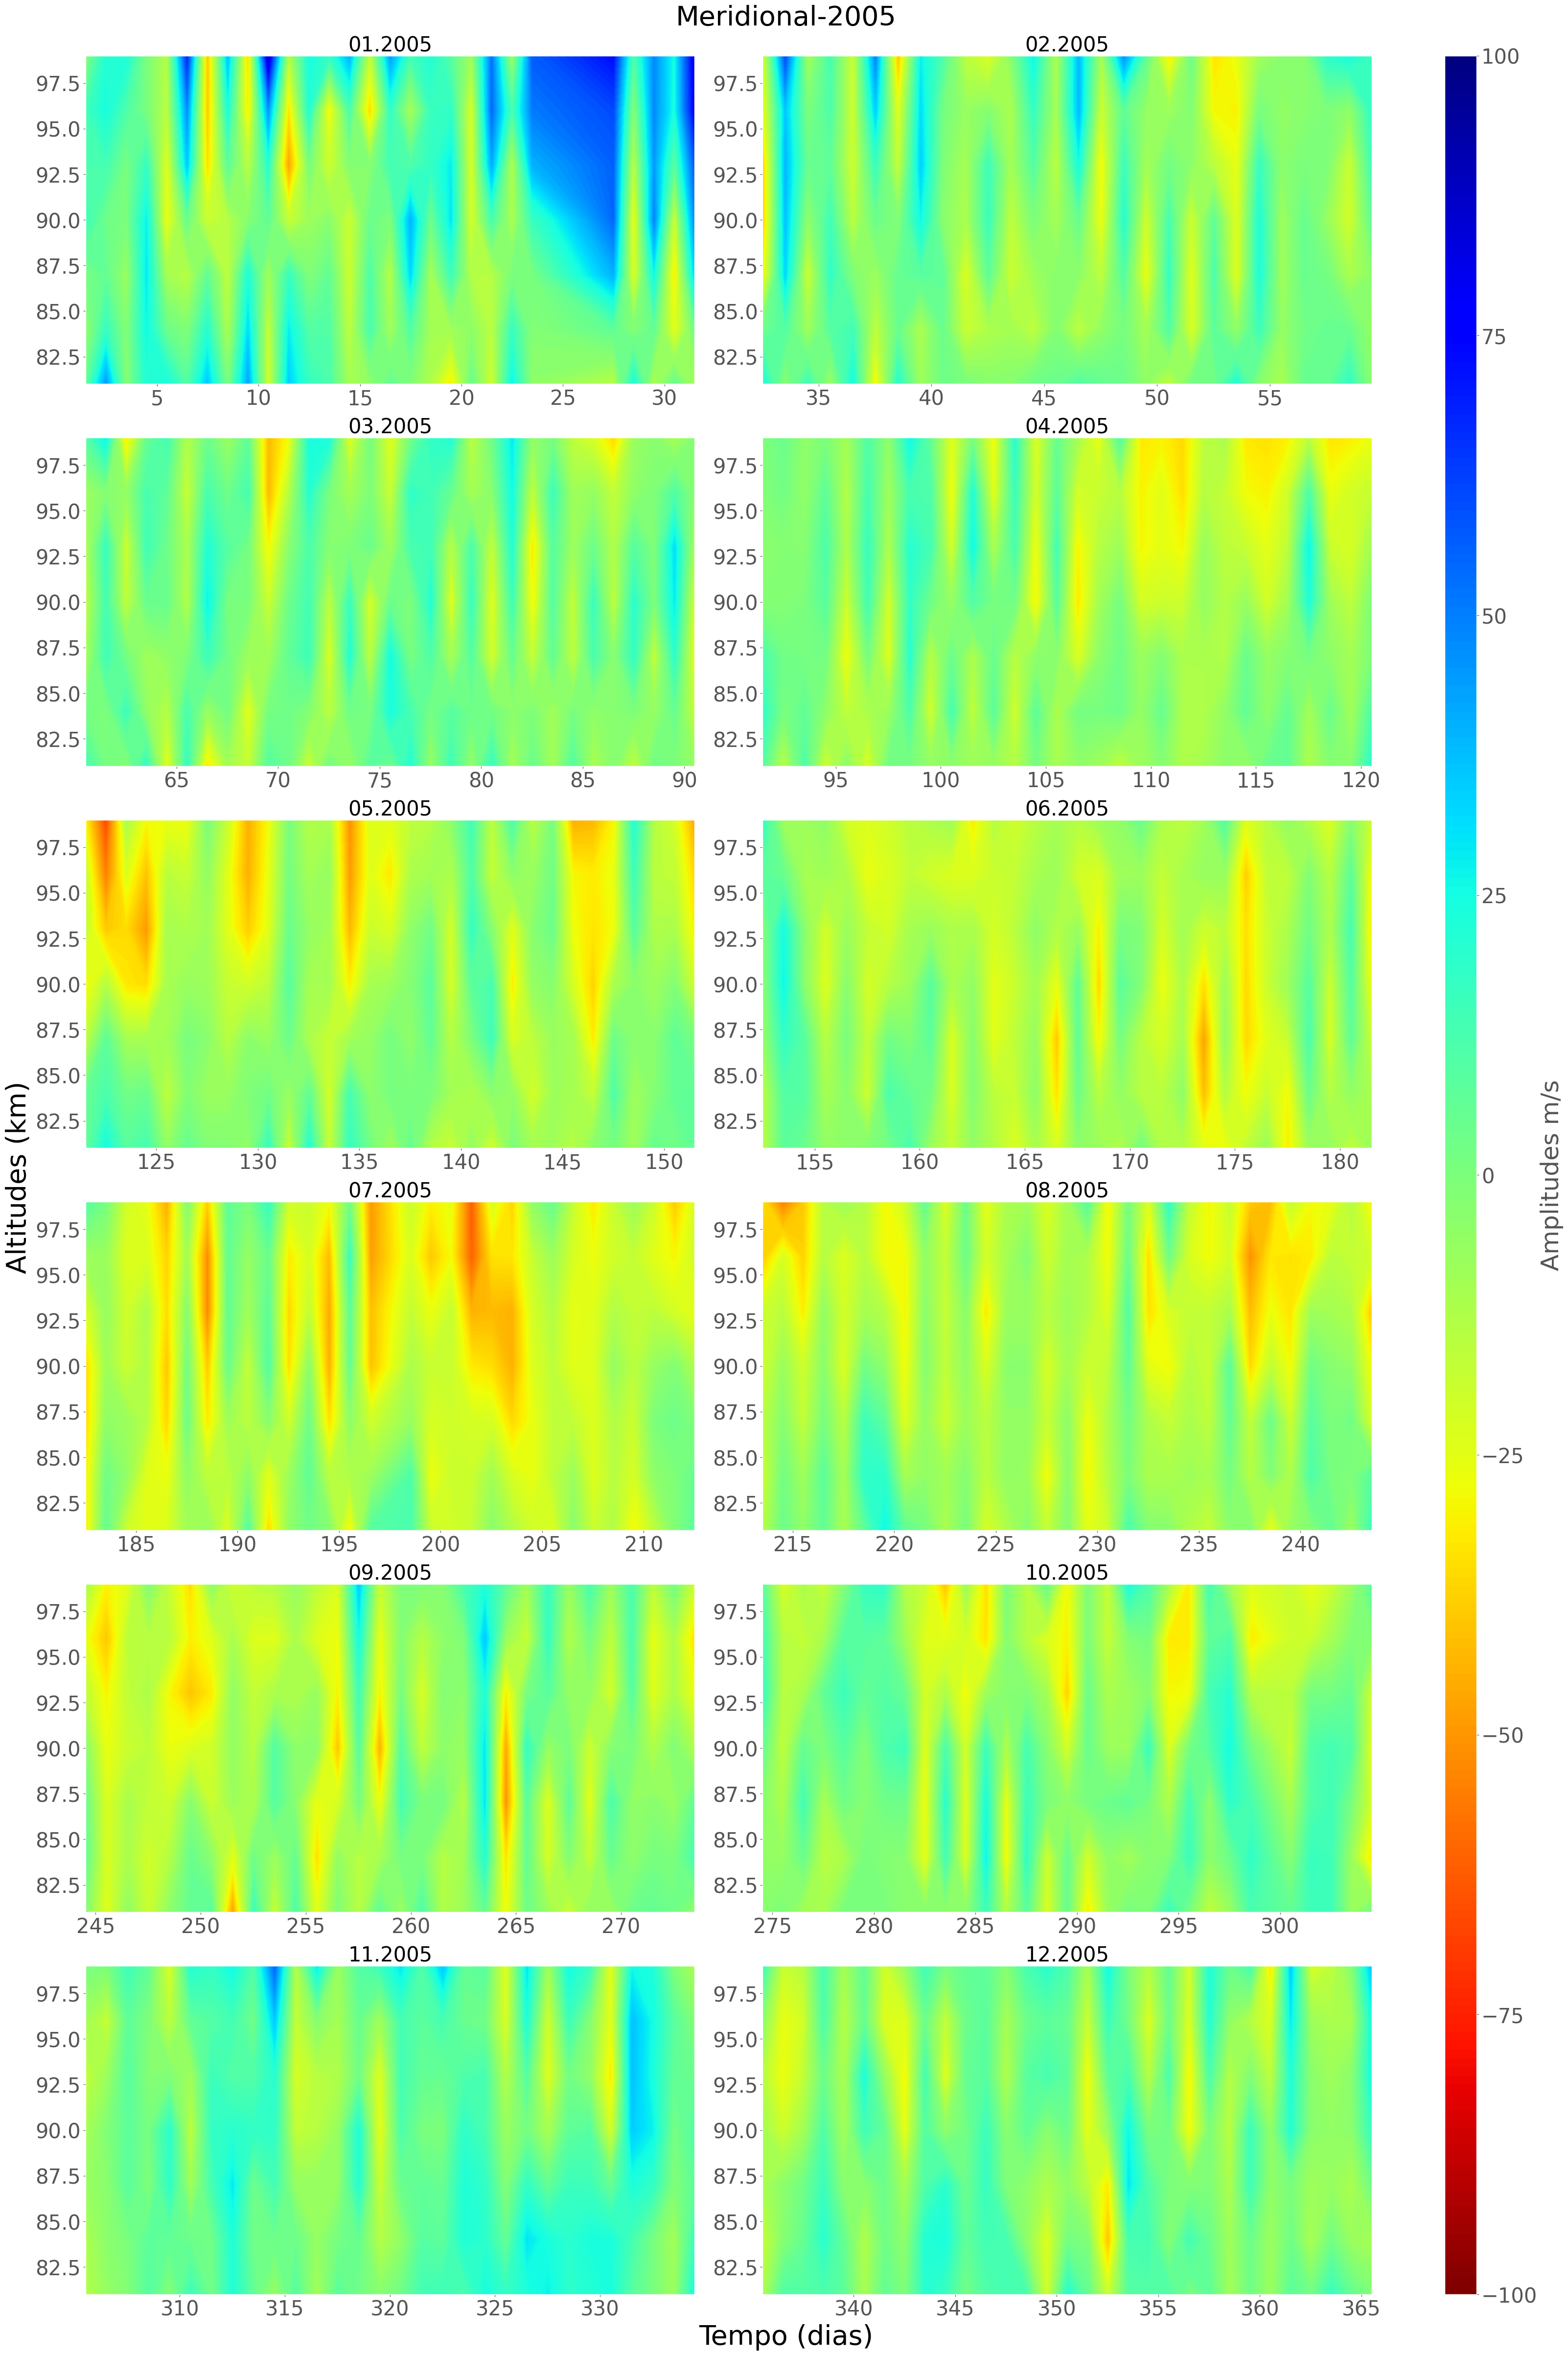

In [89]:
plot_figures("Meridional-2005", dados_meridional_2005, cabe)

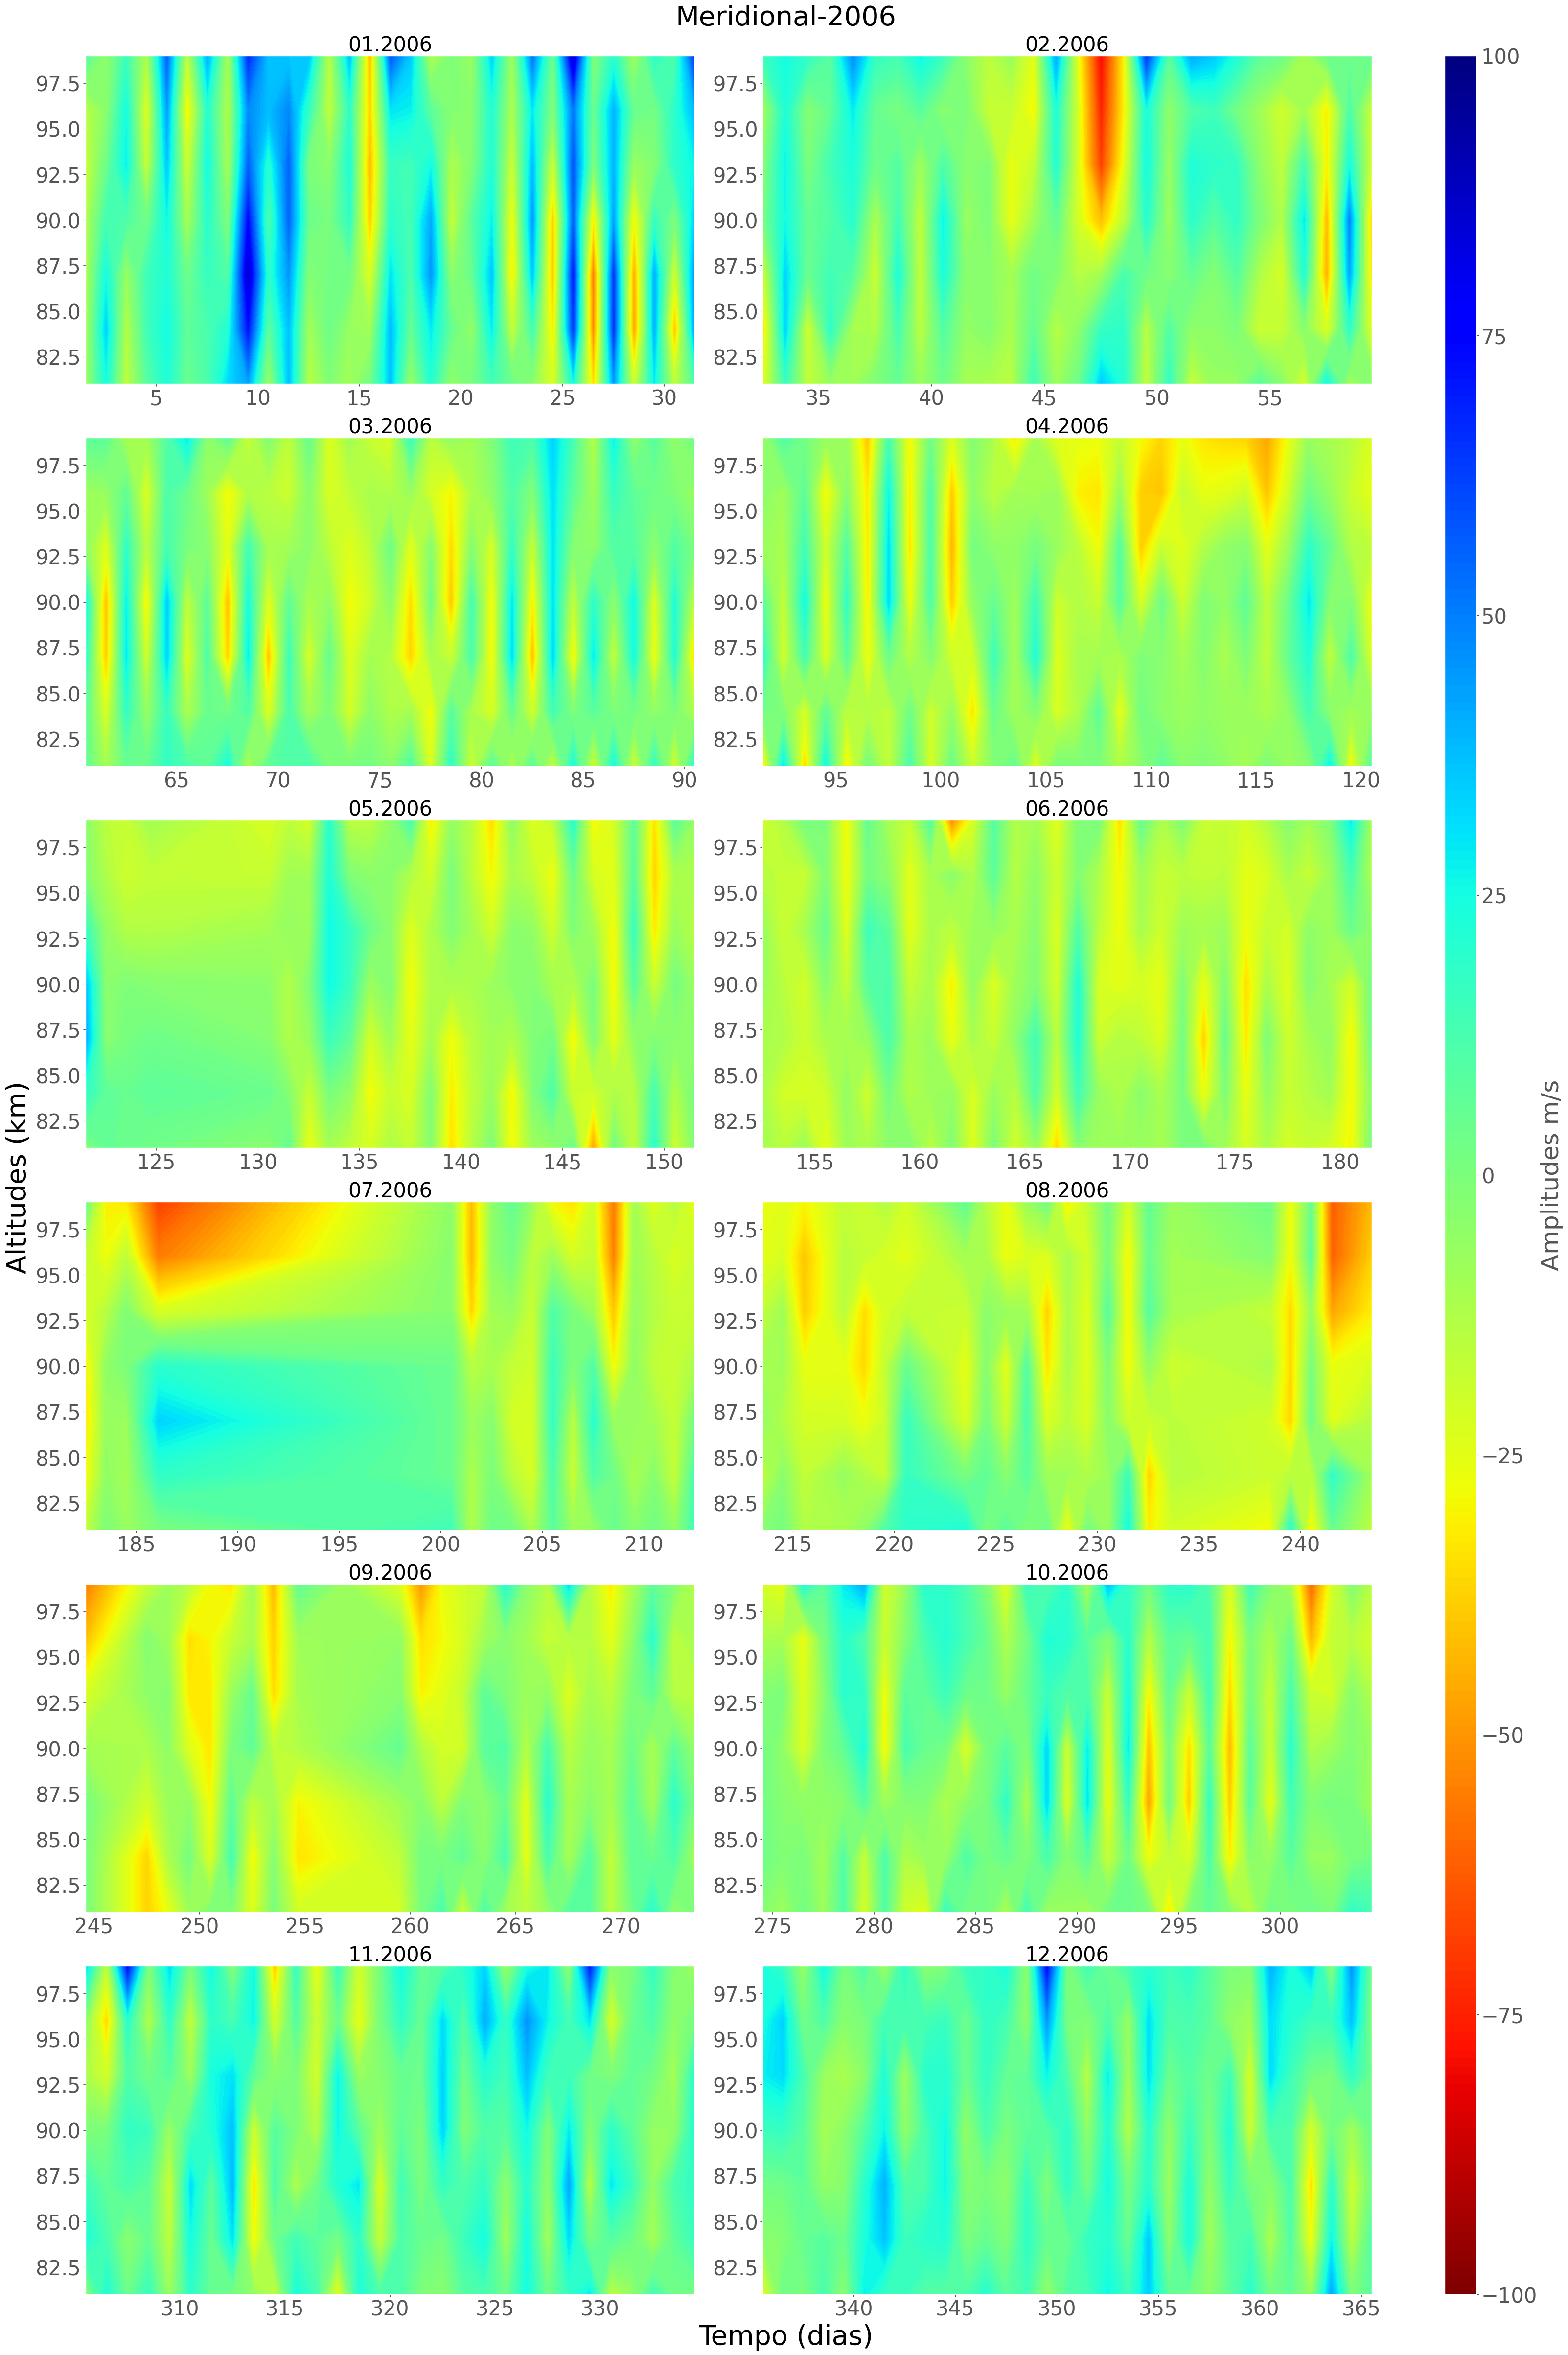

In [90]:
plot_figures("Meridional-2006", dados_meridional_2006, cabe)

In [91]:
##### 